Work7_linear_regression

In [1]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

!mkdir /root/.kaggle/ 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"avielbbaz","key":"b9e35e8b71e0611fbd90b49b45fde304"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!mkdir ./datasets
!mkdir ./datasets/Diamonds
!mkdir ./datasets/US_cars
!mkdir ./datasets/Forbes_Billionaires

In [4]:
!kaggle datasets list -s Diamonds

ref                                                        title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shivam2503/diamonds                                        Diamonds                                         733KB  2017-05-25 03:06:57          62647        886  0.7647059        
nancyalaswad90/diamonds-prices                             Diamonds Prices                                  711KB  2022-07-09 14:59:21           5285        151  1.0              
miguelcorraljr/brilliant-diamonds                          Brilliant Diamonds                                 1MB  2020-12-14 04:18:52            967         31  1.0              
harshitlakhani/natural-diamonds-prices-images              Natural Diamonds (Prices + Images)       

In [5]:
!kaggle datasets list -s US

ref                                                        title                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------  -----  -------------------  -------------  ---------  ---------------  
unanimad/us-election-2020                                  US Election 2020                429KB  2020-12-28 21:12:35          19969        542  1.0              
sobhanmoosavi/us-accidents                                 US Accidents (2016 - 2021)      269MB  2022-03-12 07:23:02          67730       1710  1.0              
ahsen1330/us-police-shootings                              US Police Shootings             126KB  2020-07-30 04:23:34          12625        361  0.9705882        
doaaalsenani/usa-cers-dataset                              US Cars Dataset                  66KB  2020-04-22 14:38:05          23538        318  1.0              
benhamner/2016-us-elec

In [6]:
!kaggle datasets list -s Billionaires

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jjdaguirre/forbes-billionaires-2022                        Forbes billionaires 2022                         56KB  2022-04-30 18:48:22           1941         46  1.0              
roysouravcu/forbes-billionaires-of-2021                    Forbes Billionaires of 2021                      53KB  2021-05-17 08:59:44           4129         79  1.0              
kkhandekar/billionaires-index                              Billionaires Index                               11KB  2021-11-01 02:01:18            670         28  1.0              
alexanderbader/forbes-billionaires-2021-30                 Forbes Billionaires 2021 3.0                  

In [7]:
!kaggle datasets download -d shivam2503/diamonds -p ./datasets/Diamonds
!unzip ./datasets/Diamonds*.zip -d ./datasets/Diamonds
!ls ./datasets/Diamonds

100% 733k/733k [00:00<00:00, 1.10MB/s]
100% 733k/733k [00:00<00:00, 1.10MB/s]
unzip:  cannot find or open ./datasets/Diamonds*.zip, ./datasets/Diamonds*.zip.zip or ./datasets/Diamonds*.zip.ZIP.

No zipfiles found.
diamonds.zip


In [8]:
!kaggle datasets download -d doaaalsenani/usa-cers-dataset -p ./datasets/US_cars
!unzip ./datasets/US_cars*.zip -d ./datasets/US_cars
!ls ./datasets/US_cars

100% 65.9k/65.9k [00:00<00:00, 448kB/s]
100% 65.9k/65.9k [00:00<00:00, 447kB/s]
unzip:  cannot find or open ./datasets/US_cars*.zip, ./datasets/US_cars*.zip.zip or ./datasets/US_cars*.zip.ZIP.

No zipfiles found.
usa-cers-dataset.zip


In [69]:
!kaggle datasets download -d roysouravcu/forbes-billionaires-of-2021 -p ./datasets/Forbes_Billionaires
!unzip ./datasets/Forbes_Billionaires*.zip -d ./datasets/Forbes_Billionaires
!ls ./datasets/Forbes_Billionaires

forbes-billionaires-of-2021.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open ./datasets/Forbes_Billionaires*.zip, ./datasets/Forbes_Billionaires*.zip.zip or ./datasets/Forbes_Billionaires*.zip.ZIP.

No zipfiles found.
forbes-billionaires-of-2021.zip


In [70]:
diamond_df = pd.read_csv('/content/datasets/Diamonds/diamonds.zip')
us_cars_df = pd.read_csv('/content/datasets/US_cars/usa-cers-dataset.zip')
forbes_billionaires_df = pd.read_csv('/content/datasets/Forbes_Billionaires/forbes-billionaires-of-2021.zip')

Part 1 - Diamonds

In [11]:
diamond_df = diamond_df.drop_duplicates()
diamond_df = diamond_df.dropna()
diamond_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Q1

In [12]:
from scipy.stats import pearsonr
corr,_ = pearsonr(diamond_df['carat'],diamond_df['price'])
print(f'Pearsons correlation between carat and price is: {corr}')
corr1,_ = pearsonr(diamond_df['depth'],diamond_df['price'])
print(f'Pearsons correlation between depth and price is: {corr1}')

Pearsons correlation between carat and price is: 0.9215913011934771
Pearsons correlation between depth and price is: -0.010647404584142987


Q2

In [13]:
cols = ['carat','depth','table','price','x','y','z']
new_diamonds_df = diamond_df[cols]

In [14]:
corr = new_diamonds_df.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


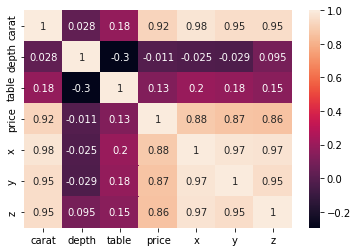

In [15]:
import seaborn as sns 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Q3 

In [16]:
from sklearn.linear_model import LinearRegression
def regression_on_clarity_type(df, clarity_type):
  df = df[df['clarity']==clarity_type][['carat','price']]
  norm_df = (df-df.min())/(df.max()-df.min()) # normalizing
  x = np.array(norm_df['carat']).reshape(-1, 1)
  y = np.array(norm_df['price']).reshape(-1, 1)
  model = LinearRegression()
  model.fit(x,y)
  return model

linreg_based_on_clarity = {}
clarity_types = set(diamond_df['clarity'])
for clarity_type in clarity_types:
  linreg_based_on_clarity[f'{clarity_type}'] = regression_on_clarity_type(diamond_df, clarity_type)

linreg_based_on_clarity

{'VVS2': LinearRegression(),
 'IF': LinearRegression(),
 'VVS1': LinearRegression(),
 'SI1': LinearRegression(),
 'I1': LinearRegression(),
 'VS2': LinearRegression(),
 'VS1': LinearRegression(),
 'SI2': LinearRegression()}

Q4 

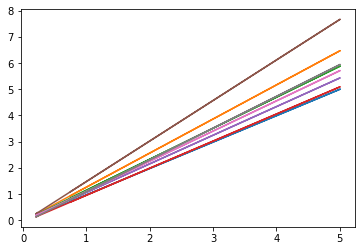

In [103]:
for model in linreg_based_on_clarity.values():
  x = np.array(diamond_df['carat']).reshape(-1, 1)
  plt.plot(x, model.predict(x))

Q5

In [17]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
train_diamond_df, test_diamond_df = train_test_split(diamond_df, test_size=0.3)
data_point_list = [row.values for index,row in train_diamond_df[['carat','depth','table','price','x','y','z']].iterrows()]
mlinreg = LinearRegression()
mlinreg.fit(data_point_list,train_diamond_df['price'].values)

y_predict = mlinreg.predict([row.values for index,row in test_diamond_df[['carat','depth','table','price','x','y','z']].iterrows()])
MAE = metrics.mean_absolute_error(test_diamond_df['price'].values,y_predict)
RMSE = metrics.mean_squared_error(test_diamond_df['price'].values,y_predict)
print("Model MAE value:", MAE) 
print("Model RMSE value:",RMSE)

Model MAE value: 1.826626135260317e-12
Model RMSE value: 5.759370252355699e-24


Part 2 - US cars

In [18]:
us_cars_df = us_cars_df.drop_duplicates()
us_cars_df = us_cars_df.dropna()
us_cars_df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


Q1

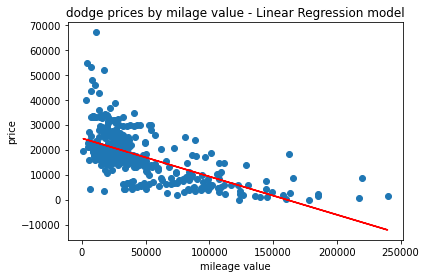

In [19]:
us_dodge_cars_df = us_cars_df[us_cars_df['brand']=='dodge']
list_of_lists_mileage = [[n] for n in us_dodge_cars_df['mileage'].values]
linreg_us_dodge_cars = LinearRegression()
linreg_us_dodge_cars.fit(list_of_lists_mileage,us_dodge_cars_df['price'].values)
x = np.array(us_dodge_cars_df['mileage']).reshape(-1,1)
plt.scatter(us_dodge_cars_df['mileage'],us_dodge_cars_df['price'])
plt.xlabel("mileage value")
plt.ylabel("price")
plt.title("dodge prices by milage value - Linear Regression model")
plt.plot(x,linreg_us_dodge_cars.predict(x),color = 'red')

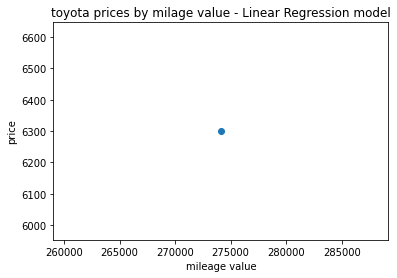

In [20]:
us_toyota_cars_df = us_cars_df[us_cars_df['brand']=='toyota'] 
list_of_lists_mileage = [[n] for n in us_toyota_cars_df['mileage'].values]
linreg_us_toyota_cars = LinearRegression()
linreg_us_toyota_cars.fit(list_of_lists_mileage,us_toyota_cars_df['price'].values)
x = np.array(us_toyota_cars_df['mileage']).reshape(-1,1)
plt.scatter(us_toyota_cars_df['mileage'],us_toyota_cars_df['price'])
plt.xlabel("mileage value")
plt.ylabel("price")
plt.title("toyota prices by milage value - Linear Regression model")
plt.plot(x,linreg_us_toyota_cars.predict(x),color = 'red')

Q2

In [21]:
import plotly.express as px
us_ford_cars_df = us_cars_df[us_cars_df['brand']=='ford']
data_points_list = [row.values for index,row in us_ford_cars_df[['mileage','year']].iterrows()]
mlinreg_us_ford_cars = LinearRegression()
mlinreg_us_ford_cars.fit(data_points_list,us_ford_cars_df['price'].values)
us_ford_cars_df['predict price'] = mlinreg_us_ford_cars.predict([row.values for index,row in us_ford_cars_df[['mileage','year']].iterrows()])

<ipython-input-21-a4c294304887>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_ford_cars_df['predict price'] = mlinreg_us_ford_cars.predict([row.values for index,row in us_ford_cars_df[['mileage','year']].iterrows()])


Q3

In [22]:
fig = px.scatter(us_ford_cars_df, x="mileage", y="predict price", color="year",trendline="ols")

fig.show()

In [23]:
fig = px.scatter_3d(us_ford_cars_df,x="year", y="mileage", z="predict price", color="year", hover_name="model")
fig.show()

Part 3 - Forbes Billionaires

In [71]:
forbes_billionaires_df = forbes_billionaires_df.drop_duplicates()
forbes_billionaires_df = forbes_billionaires_df.dropna()
forbes_billionaires_df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


Q1

In [72]:
forbes_billionaires_df['NetWorth'] = forbes_billionaires_df['NetWorth'].apply(lambda x: float(x[1:-2]))

In [100]:
g_by_industry = forbes_billionaires_df.groupby('Industry', as_index= False)
industries = set(n for n in forbes_billionaires_df['Industry'])
dict_industry = {}
def filter_by_industry(df, industry_type):
  df = df[df['Industry'] == industry_type]
  corr,_ = pearsonr(df['NetWorth'],df['Age'])
  return f"{corr:.3f}"
for indus in industries:
  dict_industry[indus] = filter_by_industry(forbes_billionaires_df, indus)
display(dict_industry)
col = ['Industry','Corrolation Value']
df_corr = pd.DataFrame(list(dict_industry.items()), index=range(len(dict_industry)),columns=col)
df_corr = df_corr.sort_values('Corrolation Value', ascending=False)
display(df_corr)

{'Fashion & Retail': '0.137',
 'Media & Entertainment': '0.129',
 'Telecom': '0.219',
 'Metals & Mining': '0.256',
 'Finance & Investments': '0.102',
 'Logistics': '0.243',
 'Automotive': '-0.118',
 'Food & Beverage': '0.044',
 'Gambling & Casinos': '0.171',
 'Healthcare': '0.148',
 'Energy': '-0.114',
 'Technology': '-0.011',
 'Diversified': '0.040',
 'Service': '-0.084',
 'Sports': '0.315',
 'Real Estate': '0.086',
 'Manufacturing': '0.169',
 'Construction & Engineering': '0.369'}

,Industry,Corrolation Value
17,Construction & Engineering,0.369
14,Sports,0.315
3,Metals & Mining,0.256
5,Logistics,0.243
2,Telecom,0.219
8,Gambling & Casinos,0.171
16,Manufacturing,0.169
9,Healthcare,0.148
0,Fashion & Retail,0.137
1,Media & Entertainment,0.129


Q2

In [101]:
fig = px.bar(df_corr, x="Industry",y="Corrolation Value",color='Industry')
fig.show()